# Importing neccessary librarires


In [1]:
import tensorflow as tf 
import cv2
import numpy as np 
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop

# Extract data from the Dataset

In [2]:
fldr = "./UTKFace"
import os 
files = os.listdir(fldr)

In [3]:
ages = []
genders  = []
images = []

for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr+'/'+ fle
    print(total)
    image = cv2.imread(total)

    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)





./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

# Creating List of Age and Gender from the Dataset

In [4]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

# Viewing a Sample

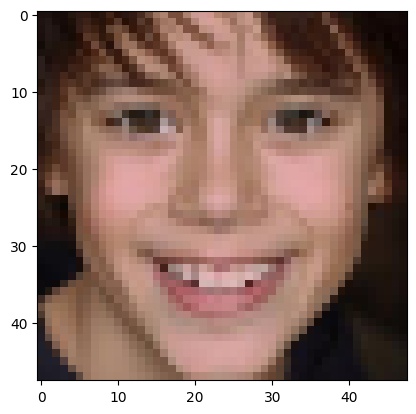

In [5]:
plt.imshow(images[54])

In [6]:
print(ages[54])

10


In [7]:
print(genders[54])

0


# Saving Image array, Age array, Gender array in the system 

In [8]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [9]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

# Visualizing and counting  the number of  the Male and Female in the Dataset

In [10]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


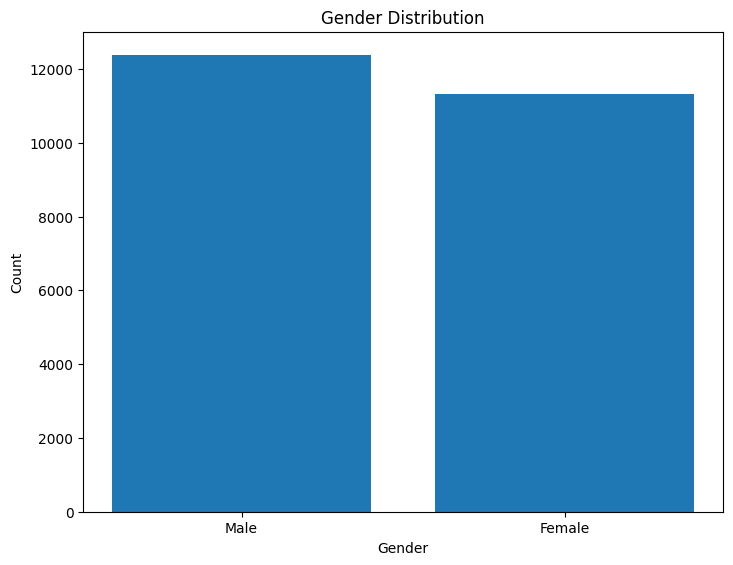

In [11]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
gender = ['Male', 'Female']
ax.bar(gender, counts) 
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

# Number of samples in Each Age Range

In [12]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


# Converting Age Count in list

In [13]:
val = values.tolist()
cnt = counts.tolist()

# Plotting the Samples agewise

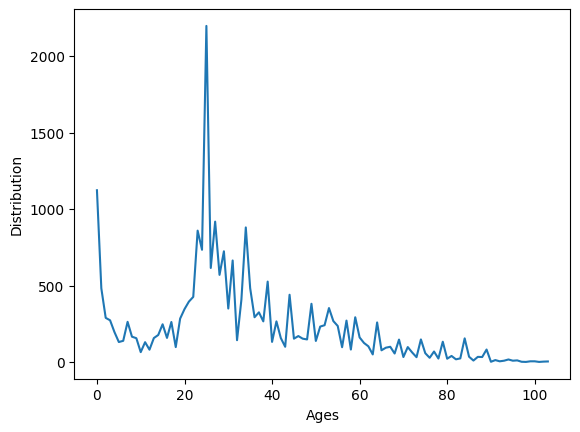

In [14]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

# Defining LAbels for Output

In [15]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

# Creating another list of images from existing one For better learning

In [16]:
images_n=images_f/255

In [17]:
images_n.shape

(23708, 48, 48, 3)

In [18]:
labels_f=np.array(labels)

In [19]:
labels_f.shape

(23708, 2)

# Splitting the Dataset into Train and test Set

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(images_n,labels_f,test_size=0.25)


In [21]:
y_train[0:5]

array([[34,  0],
       [50,  0],
       [60,  0],
       [32,  1],
       [26,  0]])

# First Column is for Age and Second One is for Gender

#Splitting 'y_test' and 'y_train' further
For better understanding

In [22]:
y_train_2 = [y_train[:,1],y_train[:,0]]
y_test_2 = [y_test[:,1],y_test[:,0]]

In [23]:
y_train_2[0][0:5]

array([0, 0, 0, 1, 0])

In [24]:
y_test_2[1][0:5]

array([32, 25, 32, 40, 58])

In [25]:
from tensorflow.keras.regularizers import l2

# Defining the model 

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding="same", strides=(1, 1), kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

input_shape = (48, 48, 3)

def model_arch(input_shape):
    inputs = Input(input_shape)
    
    conv_1 = convolution(inputs, 32)
    max_pool_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
    
    conv_2 = convolution(max_pool_1, 64)
    max_pool_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
    
    conv_3 = convolution(max_pool_2, 128)
    max_pool_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    
    conv_4 = convolution(max_pool_3, 256)
    max_pool_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
    
    flatten = Flatten()(max_pool_4)
    
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)
    
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    
    output_1 = Dense(1, activation='sigmoid', name='gender')(drop_1)
    output_2 = Dense(1, activation='relu', name='age')(drop_2)
    
    model = Model(inputs=[inputs], outputs=[output_1, output_2])

    # Corrected metrics for each output
    model.compile(
        loss=["binary_crossentropy", "mae"], 
        optimizer='Adam', 
        metrics=[['accuracy'], ['mae']]  # Metrics for gender (accuracy) and age (mae)
    )
    
    return model

    

model = model_arch(input_shape)





In [27]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Corrected variable name for ModelCheckpoint callback
fle_s = 'Age_Sex_Detection.h5'
checkpoint = ModelCheckpoint(fle_s, monitor='val_age_mae', save_best_only=True, verbose=1, save_weights_only=False, mode='min', save_freq='epoch')
early_stopping = EarlyStopping(patience=25, monitor='val_age_mae', restore_best_weights=True, mode='min')
callback_list = [checkpoint, early_stopping]

# Initializing the Model

In [29]:
History = model.fit(X_train, y_train_2, batch_size = 64, validation_data = (X_test, y_test_2), epochs = 250, callbacks = callback_list)

Epoch 1/250


c:\Users\anshu yadav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 48, 48, 3))
  warnings.warn(msg)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - age_loss: 17.8943 - age_mae: 17.8943 - gender_accuracy: 0.5660 - gender_loss: 0.6921 - loss: 18.7933
Epoch 1: val_age_mae improved from inf to 15.71935, saving model to Age_Sex_Detection.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - age_loss: 17.8889 - age_mae: 17.8889 - gender_accuracy: 0.5661 - gender_loss: 0.6921 - loss: 18.7877 - val_age_loss: 15.7277 - val_age_mae: 15.7194 - val_gender_accuracy: 0.7004 - val_gender_loss: 0.6504 - val_loss: 16.5275
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - age_loss: 13.8195 - age_mae: 13.8195 - gender_accuracy: 0.6486 - gender_loss: 0.6347 - loss: 14.6244
Epoch 2: val_age_mae improved from 15.71935 to 11.24803, saving model to Age_Sex_Detection.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 28s 102ms/step - age_loss: 13.8168 - age_mae: 13.8168 - gender_accuracy: 0.6488 - gender_loss: 0.6346 - loss: 14.6217 - val_age_loss: 11.2616 - val_age_mae: 11.2480 - val_gender_accuracy: 0.7451 - val_gender_loss: 0.5391 - val_loss: 12.0194
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - age_loss: 11.0155 - age_mae: 11.0155 - gender_accuracy: 0.7297 - gender_loss: 0.5432 - loss: 11.8039
Epoch 3: val_age_mae did not improve from 11.24803
278/278 ━━━━━━━━━━━━━━━━━━━━ 28s 100ms/step - age_loss: 11.0139 - age_mae: 11.0139 - gender_accuracy: 0.7297 - gender_loss: 0.5432 - loss: 11.8024 - val_age_loss: 14.2148 - val_age_mae: 14.2025 - val_gender_accuracy: 0.7716 - val_gender_loss: 0.5002 - val_loss: 14.9761
Epoch 4/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - age_loss: 9.8369 - age_mae: 9.8369 - gender_accuracy: 0.7648 - gender_loss: 0.4907 - loss: 10.6091
Epoch 4: val_age_mae did not improve from 11.24803
278/278 ━━━━━━━━━━━━━━━━━━━━ 29s 103ms/step - 

278/278 ━━━━━━━━━━━━━━━━━━━━ 28s 102ms/step - age_loss: 8.6802 - age_mae: 8.6802 - gender_accuracy: 0.8052 - gender_loss: 0.4075 - loss: 9.4194 - val_age_loss: 9.0731 - val_age_mae: 9.0593 - val_gender_accuracy: 0.7910 - val_gender_loss: 0.4168 - val_loss: 9.8234
Epoch 7/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - age_loss: 8.3292 - age_mae: 8.3292 - gender_accuracy: 0.8106 - gender_loss: 0.3962 - loss: 9.0771
Epoch 7: val_age_mae improved from 9.05935 to 8.96041, saving model to Age_Sex_Detection.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 29s 104ms/step - age_loss: 8.3290 - age_mae: 8.3290 - gender_accuracy: 0.8106 - gender_loss: 0.3961 - loss: 9.0768 - val_age_loss: 8.9722 - val_age_mae: 8.9604 - val_gender_accuracy: 0.8363 - val_gender_loss: 0.3585 - val_loss: 9.6846
Epoch 8/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - age_loss: 8.1506 - age_mae: 8.1506 - gender_accuracy: 0.8262 - gender_loss: 0.3790 - loss: 8.9001
Epoch 8: val_age_mae did not improve from 8.96041
278/278 ━━━━━━━━━━━━━━━━━━━━ 29s 103ms/step - age_loss: 8.1502 - age_mae: 8.1502 - gender_accuracy: 0.8261 - gender_loss: 0.3790 - loss: 8.8997 - val_age_loss: 9.4671 - val_age_mae: 9.4534 - val_gender_accuracy: 0.8433 - val_gender_loss: 0.3484 - val_loss: 10.1868
Epoch 9/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - age_loss: 7.7770 - age_mae: 7.7770 - gender_accuracy: 0.8342 - gender_loss: 0.3635 - loss: 8.5298
Epoch 9: val_age_mae improved from 8.96041 to 8.72534, saving model to Age_Sex_Detection.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 28s 99ms/step - age_loss: 7.7772 - age_mae: 7.7772 - gender_accuracy: 0.8342 - gender_loss: 0.3635 - loss: 8.5301 - val_age_loss: 8.7365 - val_age_mae: 8.7253 - val_gender_accuracy: 0.8498 - val_gender_loss: 0.3271 - val_loss: 9.4568
Epoch 10/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - age_loss: 7.4416 - age_mae: 7.4416 - gender_accuracy: 0.8407 - gender_loss: 0.3455 - loss: 8.1952
Epoch 10: val_age_mae did not improve from 8.72534
278/278 ━━━━━━━━━━━━━━━━━━━━ 29s 104ms/step - age_loss: 7.4419 - age_mae: 7.4419 - gender_accuracy: 0.8407 - gender_loss: 0.3455 - loss: 8.1956 - val_age_loss: 11.9775 - val_age_mae: 11.9707 - val_gender_accuracy: 0.8492 - val_gender_loss: 0.3312 - val_loss: 12.7215
Epoch 11/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - age_loss: 7.4903 - age_mae: 7.4903 - gender_accuracy: 0.8465 - gender_loss: 0.3323 - loss: 8.2471
Epoch 11: val_age_mae improved from 8.72534 to 8.32983, saving model to Age_Sex_Detection.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 29s 106ms/step - age_loss: 7.4900 - age_mae: 7.4900 - gender_accuracy: 0.8465 - gender_loss: 0.3323 - loss: 8.2469 - val_age_loss: 8.3391 - val_age_mae: 8.3298 - val_gender_accuracy: 0.8642 - val_gender_loss: 0.3056 - val_loss: 9.0723
Epoch 12/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - age_loss: 7.2382 - age_mae: 7.2382 - gender_accuracy: 0.8421 - gender_loss: 0.3302 - loss: 8.0091
Epoch 12: val_age_mae improved from 8.32983 to 7.92051, saving model to Age_Sex_Detection.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 31s 111ms/step - age_loss: 7.2387 - age_mae: 7.2387 - gender_accuracy: 0.8421 - gender_loss: 0.3302 - loss: 8.0096 - val_age_loss: 7.9299 - val_age_mae: 7.9205 - val_gender_accuracy: 0.8638 - val_gender_loss: 0.2984 - val_loss: 8.6732
Epoch 13/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - age_loss: 6.8996 - age_mae: 6.8996 - gender_accuracy: 0.8512 - gender_loss: 0.3249 - loss: 7.6825
Epoch 13: val_age_mae did not improve from 7.92051
278/278 ━━━━━━━━━━━━━━━━━━━━ 128s 462ms/step - age_loss: 6.9001 - age_mae: 6.9001 - gender_accuracy: 0.8512 - gender_loss: 0.3249 - loss: 7.6830 - val_age_loss: 8.0174 - val_age_mae: 8.0120 - val_gender_accuracy: 0.8627 - val_gender_loss: 0.3066 - val_loss: 8.7858
Epoch 14/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - age_loss: 6.8956 - age_mae: 6.8956 - gender_accuracy: 0.8602 - gender_loss: 0.3125 - loss: 7.6791
Epoch 14: val_age_mae did not improve from 7.92051
278/278 ━━━━━━━━━━━━━━━━━━━━ 29s 105ms/step - age_loss: 6.

278/278 ━━━━━━━━━━━━━━━━━━━━ 29s 103ms/step - age_loss: 6.4277 - age_mae: 6.4277 - gender_accuracy: 0.8768 - gender_loss: 0.2865 - loss: 7.2445 - val_age_loss: 7.6061 - val_age_mae: 7.6002 - val_gender_accuracy: 0.8816 - val_gender_loss: 0.2744 - val_loss: 8.4167
Epoch 19/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - age_loss: 6.5151 - age_mae: 6.5151 - gender_accuracy: 0.8846 - gender_loss: 0.2781 - loss: 7.3396
Epoch 19: val_age_mae did not improve from 7.60021
278/278 ━━━━━━━━━━━━━━━━━━━━ 28s 102ms/step - age_loss: 6.5147 - age_mae: 6.5147 - gender_accuracy: 0.8846 - gender_loss: 0.2782 - loss: 7.3393 - val_age_loss: 8.4335 - val_age_mae: 8.4274 - val_gender_accuracy: 0.8790 - val_gender_loss: 0.2668 - val_loss: 9.2505
Epoch 20/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - age_loss: 6.2625 - age_mae: 6.2624 - gender_accuracy: 0.8800 - gender_loss: 0.2778 - loss: 7.0994
Epoch 20: val_age_mae did not improve from 7.60021
278/278 ━━━━━━━━━━━━━━━━━━━━ 25s 91ms/step - age_loss: 6.262

278/278 ━━━━━━━━━━━━━━━━━━━━ 42s 103ms/step - age_loss: 5.9963 - age_mae: 5.9963 - gender_accuracy: 0.8878 - gender_loss: 0.2636 - loss: 6.8614 - val_age_loss: 7.0485 - val_age_mae: 7.0427 - val_gender_accuracy: 0.8838 - val_gender_loss: 0.2591 - val_loss: 7.9123
Epoch 24/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - age_loss: 6.0179 - age_mae: 6.0179 - gender_accuracy: 0.8854 - gender_loss: 0.2682 - loss: 6.9000
Epoch 24: val_age_mae did not improve from 7.04266
278/278 ━━━━━━━━━━━━━━━━━━━━ 28s 102ms/step - age_loss: 6.0180 - age_mae: 6.0180 - gender_accuracy: 0.8854 - gender_loss: 0.2681 - loss: 6.9001 - val_age_loss: 7.9736 - val_age_mae: 7.9689 - val_gender_accuracy: 0.8854 - val_gender_loss: 0.2563 - val_loss: 8.8485
Epoch 25/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - age_loss: 5.9253 - age_mae: 5.9253 - gender_accuracy: 0.8906 - gender_loss: 0.2573 - loss: 6.8090
Epoch 25: val_age_mae did not improve from 7.04266
278/278 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - age_loss: 5.92

278/278 ━━━━━━━━━━━━━━━━━━━━ 29s 104ms/step - age_loss: 5.6895 - age_mae: 5.6895 - gender_accuracy: 0.8970 - gender_loss: 0.2482 - loss: 6.6117 - val_age_loss: 7.0220 - val_age_mae: 7.0175 - val_gender_accuracy: 0.8856 - val_gender_loss: 0.2533 - val_loss: 7.9534
Epoch 30/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - age_loss: 5.6289 - age_mae: 5.6289 - gender_accuracy: 0.8924 - gender_loss: 0.2482 - loss: 6.5625
Epoch 30: val_age_mae did not improve from 7.01748
278/278 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - age_loss: 5.6292 - age_mae: 5.6292 - gender_accuracy: 0.8924 - gender_loss: 0.2482 - loss: 6.5629 - val_age_loss: 7.6411 - val_age_mae: 7.6342 - val_gender_accuracy: 0.8854 - val_gender_loss: 0.2558 - val_loss: 8.5858
Epoch 31/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - age_loss: 5.5958 - age_mae: 5.5958 - gender_accuracy: 0.9007 - gender_loss: 0.2367 - loss: 6.5306
Epoch 31: val_age_mae did not improve from 7.01748
278/278 ━━━━━━━━━━━━━━━━━━━━ 31s 111ms/step - age_loss: 5.5

278/278 ━━━━━━━━━━━━━━━━━━━━ 39s 142ms/step - age_loss: 5.4736 - age_mae: 5.4736 - gender_accuracy: 0.9019 - gender_loss: 0.2345 - loss: 6.4264 - val_age_loss: 6.8848 - val_age_mae: 6.8781 - val_gender_accuracy: 0.8812 - val_gender_loss: 0.2593 - val_loss: 7.8645
Epoch 34/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - age_loss: 5.4074 - age_mae: 5.4074 - gender_accuracy: 0.9032 - gender_loss: 0.2344 - loss: 6.3711
Epoch 34: val_age_mae did not improve from 6.87814
278/278 ━━━━━━━━━━━━━━━━━━━━ 46s 165ms/step - age_loss: 5.4079 - age_mae: 5.4079 - gender_accuracy: 0.9032 - gender_loss: 0.2344 - loss: 6.3716 - val_age_loss: 7.5217 - val_age_mae: 7.5160 - val_gender_accuracy: 0.8838 - val_gender_loss: 0.2543 - val_loss: 8.5090
Epoch 35/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - age_loss: 5.4213 - age_mae: 5.4213 - gender_accuracy: 0.9002 - gender_loss: 0.2362 - loss: 6.3986
Epoch 35: val_age_mae did not improve from 6.87814
278/278 ━━━━━━━━━━━━━━━━━━━━ 29s 103ms/step - age_loss: 5.4

278/278 ━━━━━━━━━━━━━━━━━━━━ 28s 102ms/step - age_loss: 4.9265 - age_mae: 4.9264 - gender_accuracy: 0.9172 - gender_loss: 0.1996 - loss: 6.0270 - val_age_loss: 6.7923 - val_age_mae: 6.7842 - val_gender_accuracy: 0.8915 - val_gender_loss: 0.2483 - val_loss: 7.9365
Epoch 57/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - age_loss: 4.8003 - age_mae: 4.8003 - gender_accuracy: 0.9223 - gender_loss: 0.1929 - loss: 5.8986
Epoch 57: val_age_mae did not improve from 6.78424
278/278 ━━━━━━━━━━━━━━━━━━━━ 27s 98ms/step - age_loss: 4.8006 - age_mae: 4.8006 - gender_accuracy: 0.9223 - gender_loss: 0.1929 - loss: 5.8989 - val_age_loss: 7.5265 - val_age_mae: 7.5218 - val_gender_accuracy: 0.8871 - val_gender_loss: 0.2637 - val_loss: 8.6967
Epoch 58/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - age_loss: 4.8537 - age_mae: 4.8537 - gender_accuracy: 0.9235 - gender_loss: 0.1889 - loss: 5.9545
Epoch 58: val_age_mae did not improve from 6.78424
278/278 ━━━━━━━━━━━━━━━━━━━━ 29s 103ms/step - age_loss: 4.853

278/278 ━━━━━━━━━━━━━━━━━━━━ 29s 103ms/step - age_loss: 4.7761 - age_mae: 4.7761 - gender_accuracy: 0.9203 - gender_loss: 0.1929 - loss: 5.9076 - val_age_loss: 6.5803 - val_age_mae: 6.5733 - val_gender_accuracy: 0.8919 - val_gender_loss: 0.2582 - val_loss: 7.7757
Epoch 65/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - age_loss: 4.7300 - age_mae: 4.7300 - gender_accuracy: 0.9232 - gender_loss: 0.1857 - loss: 5.8608
Epoch 65: val_age_mae did not improve from 6.57335
278/278 ━━━━━━━━━━━━━━━━━━━━ 29s 103ms/step - age_loss: 4.7302 - age_mae: 4.7302 - gender_accuracy: 0.9231 - gender_loss: 0.1857 - loss: 5.8611 - val_age_loss: 7.5682 - val_age_mae: 7.5645 - val_gender_accuracy: 0.8888 - val_gender_loss: 0.2550 - val_loss: 8.7688
Epoch 66/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - age_loss: 4.6796 - age_mae: 4.6796 - gender_accuracy: 0.9240 - gender_loss: 0.1846 - loss: 5.8138
Epoch 66: val_age_mae did not improve from 6.57335
278/278 ━━━━━━━━━━━━━━━━━━━━ 28s 102ms/step - age_loss: 4.68

# Model Evaluation

In [30]:
model.evaluate(X_test, y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - age_loss: 6.7190 - age_mae: 6.7191 - gender_accuracy: 0.8920 - gender_loss: 0.2594 - loss: 7.9223


[7.77571439743042,
 0.25854113698005676,
 6.564210414886475,
 6.573344707489014,
 0.8918508291244507]

In [31]:
pred = model.predict(X_test)

  5/186 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step  

c:\Users\anshu yadav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 48, 48, 3))
  warnings.warn(msg)


186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


In [32]:
pred[1]

array([[30.301043],
       [24.055365],
       [23.062635],
       ...,
       [31.65191 ],
       [61.49991 ],
       [51.247223]], dtype=float32)

# Plotting Loss

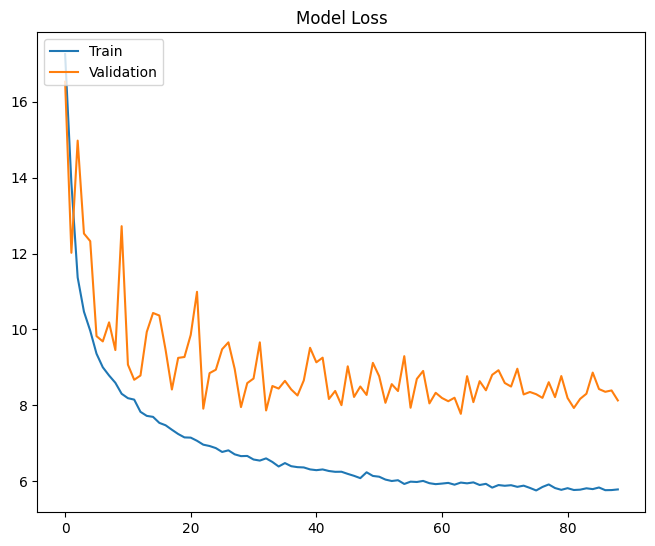

In [33]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epochs')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

# Plotting Sex_out_Accuracy

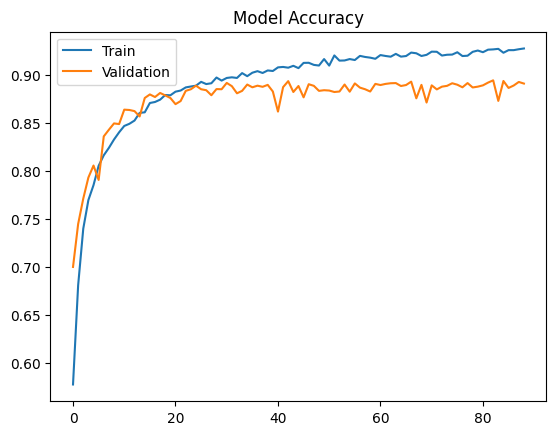

In [ ]:
plt.plot(History.history['gender_accuracy'])
plt.plot(History.history['val_gender_accuracy'])
plt.title('Model Accuracy')

# Properly using the functions for labeling the axes
ax.set_xlabel('Epochs')  
ax.set_ylabel('Accuracy')  

# Adding a legend to distinguish training vs validation
plt.legend(['Train', 'Validation'], loc='upper left')

# Display the plot
plt.show()

# Plotting Gender Accuracy

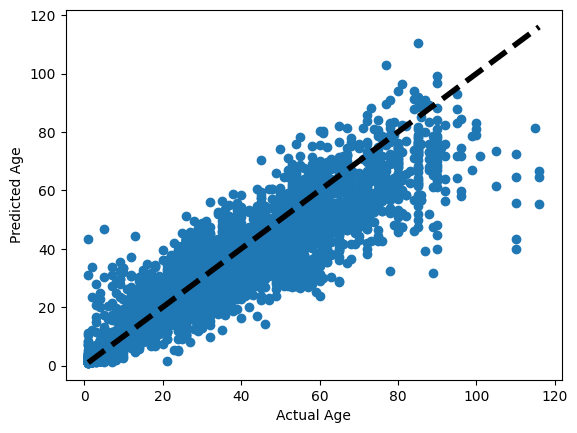

In [ ]:
fig,ax=plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

# Making Report of the model (Gender Only)

In [ ]:
i = 0
pred_l = []
while(i<len(pred[0])):
    pred_l.append(int(np.round(pred[0][i].item())))
    i = i+1

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
report=classification_report(y_test_2[0],pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      3091
           1       0.87      0.91      0.89      2836

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



# Making Heatmap of the Model (Gender only)

<Axes: >

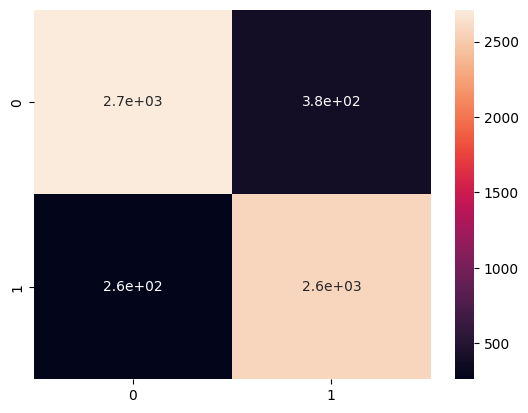

In [ ]:
results = confusion_matrix(y_test_2[0],pred_l)
import seaborn as sns
sns.heatmap(results, annot = True)

# Model Testing 

In [ ]:
def test_image(ind,images_f,images_n,Model):
    plt.imshow(images_f[ind])
    image_test=images_n[ind]
    pred_l=model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is :"+ str(age))
    print("Predicted Gender is :"+ sex_f[sex])

# Test 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Age is :89
Predicted Gender is :Female


C:\Users\anshu yadav\AppData\Local\Temp\ipykernel_22328\1648091983.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\anshu yadav\AppData\Local\Temp\ipykernel_22328\1648091983.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


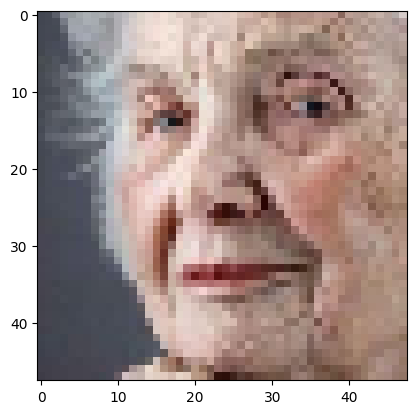

In [ ]:
test_image(4, images_f, images_n, Model)

# Test 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Age is :25
Predicted Gender is :Male


C:\Users\anshu yadav\AppData\Local\Temp\ipykernel_22328\1648091983.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\anshu yadav\AppData\Local\Temp\ipykernel_22328\1648091983.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


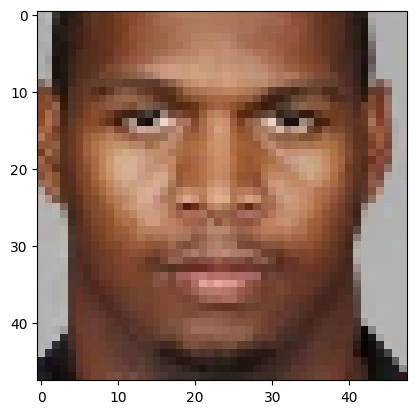

In [ ]:
test_image(8795, images_f, images_n, Model)

# Test 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Age is :8
Predicted Gender is :Female


C:\Users\anshu yadav\AppData\Local\Temp\ipykernel_22328\1648091983.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\anshu yadav\AppData\Local\Temp\ipykernel_22328\1648091983.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


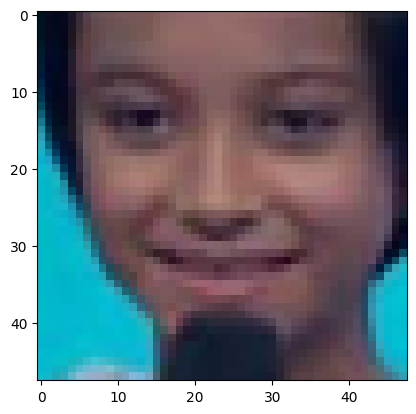

In [ ]:
test_image(168, images_f, images_n, Model)

# Test 4 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Age is :16
Predicted Gender is :Female


C:\Users\anshu yadav\AppData\Local\Temp\ipykernel_22328\1648091983.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\anshu yadav\AppData\Local\Temp\ipykernel_22328\1648091983.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


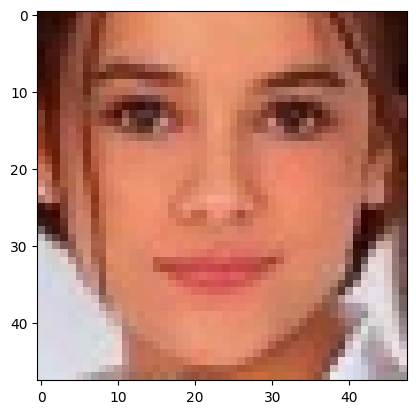

In [ ]:
test_image(1286, images_f, images_n, Model)

# Test 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Age is :14
Predicted Gender is :Female


C:\Users\anshu yadav\AppData\Local\Temp\ipykernel_22328\1648091983.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\anshu yadav\AppData\Local\Temp\ipykernel_22328\1648091983.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


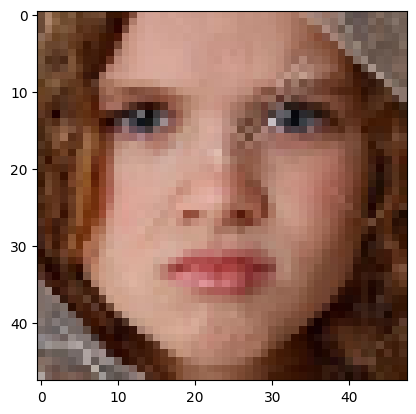

In [ ]:
test_image(566, images_f, images_n, Model)